# Ejercicio - Detección de anomalías de los clientes de un gimnasio

<img width="800px" src="https://drive.google.com/uc?id=1yVw77wj2Eu6SQ-A-uNNwCqYQHuPr_83f">

<small>Imagen de Pixabay</small>

Disponemos de los datos de los clientes de un gimnasio, concretamente conocemos la altura y el peso de cada uno de ellos.

Queremos averiguar si existen anomalías para ofrecerles planes personalizados de entrenamiento y dieta.

Por ejemplo, a los que pesan mucho en relación a su altura, les ofreceremos planes de entrenamiento con mucho ejercicio aeróbico y les propondremos dietas hipocalóricas. Y para los que pesan poco en relación a su altura, se les instará a realizar ejercicios de fuerza y a seguir dietas con alto contenido en carbohidratos.


In [1]:
import pandas as pd

In [2]:
# Carga los datos del archivo gym_customers.csv en un DataFrame

customers_df = pd.read_csv("gym_customers.csv")

In [3]:
# Muestra las primeras filas del Dataframe
customers_df.head()

,id,full_name,height,weight
0,A1B2C,Ana Ruiz,165,60
1,D3E4F,Carlos López,170,65
2,G5H6I,Sara García,168,63
3,J7K8L,David Martín,175,70
4,M9N0O,Lucía Fernández,160,55


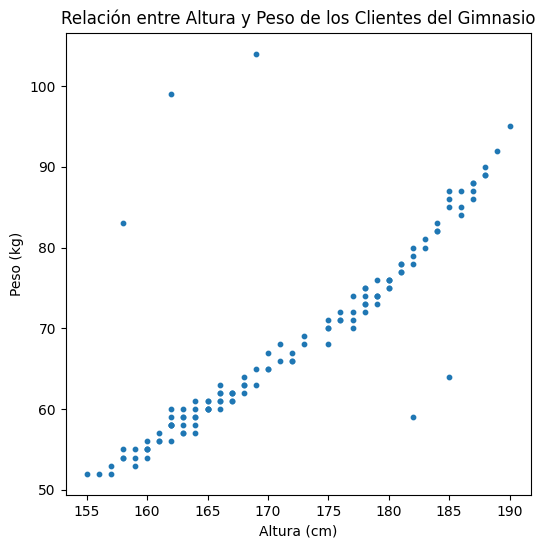

In [17]:
# Muestra una gráfica con la altura en el eje de las x y el peso en el eje de las y

# 1. Importa la librería necesaria
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))

# 2. Separa la altura y el peso
altura = customers_df["height"]
peso = customers_df["weight"]

# 3. Crea el scatter plot
plt.scatter(altura, peso, s=10)

# 4. Etiqueta los ejes
plt.xlabel("Altura (cm)")
plt.ylabel("Peso (kg)")

# 5. Ponle un título
plt.title("Relación entre Altura y Peso de los Clientes del Gimnasio")

# 6. Muestra la gráfica
plt.show()


In [18]:
# Importa la clase LocalOutlierFactor de la librería Scikit Learn
from sklearn.neighbors import LocalOutlierFactor


In [21]:
# Extrae las columnas de altura y peso

X = customers_df[["height", "weight"]]

In [22]:
# Inicializa el modelo

lof = LocalOutlierFactor()

In [24]:
# Extrae los outliers

outliers = lof.fit_predict(X=X)
outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [25]:
# Añade la columna de outliers al DataFrame original. Llama a esa columna "outlier"

customers_df["outlier"] = outliers

In [28]:
# Muestra las filas de la 35 a la 45 ¿ves algún outlier?

customers_df[35:46]

,id,full_name,height,weight,outlier
35,B1C2D,Carlos García,179,74,1
36,E3F4G,Lucía Fernández,167,62,1
37,H5I6J,Miguel Torres,181,77,1
38,K7L8M,Sofía Sánchez,158,83,-1
39,N9O0P,Daniel López,186,84,1
40,Q1R2S,Marta García,163,57,1
41,T3U4V,Álvaro Martín,177,72,1
42,W5X6Y,Julia Fernández,165,60,1
43,Z7A8B,Ricardo Torres,180,76,1
44,C9D0E,Patricia Ramírez,169,63,1


Podemos observa que la fila 38 se trata de un *outlier* donde tenemos una persona que es baja pero por el contrario tiene un peso elevado, lo cual no suele ser la regla general.

In [31]:
# Muestra todos los outliers detectados (todas las filas correspondiente a outliers)

customers_df[customers_df["outlier"] == -1]

,id,full_name,height,weight,outlier
38,K7L8M,Sofía Sánchez,158,83,-1
59,V9W0X,Miguel Martín,182,59,-1
60,Y1Z2A,Sofía Fernández,155,52,-1
66,Q3R4S,Isabel Ruiz,169,104,-1
68,W7X8Y,Ana García,162,99,-1
99,L9M0N,Jorge López,185,64,-1


In [48]:
# Muestra el número total de outliers, inliers y el porcentaje de outliers respecto del total de clientes

# Outliers - 6
outliers_count = (customers_df["outlier"] != 1).sum()
print(f"Número total de outliers: {outliers_count}")

# Inliers - 123
inliers_count = (customers_df["outlier"] == 1).sum()
print(f"Número total de inliers: {inliers_count}")

# Porcentaje de outliers vs inliers - 4.6511627
print(f"Porcentaje de outliers respecto al total de clientes: {outliers_count / len(customers_df)}")


Número total de outliers: 6
Número total de inliers: 123
Porcentaje de outliers respecto al total de clientes: 0.046511627906976744


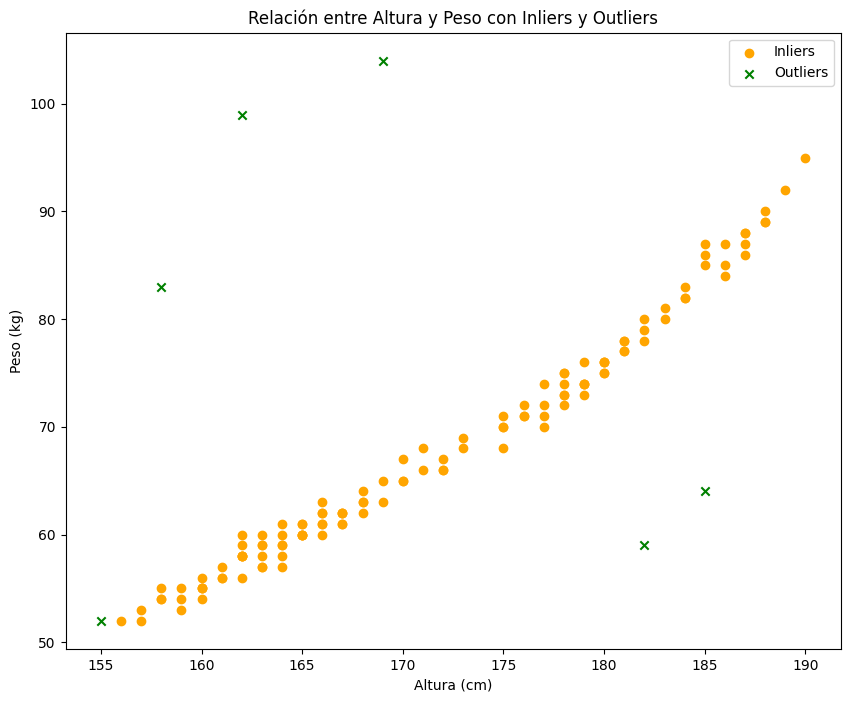

In [57]:
# Muestra una gráfica en la que se vean los inliers y los outliers en colores diferentes
# Los inliers se deben representar como puntos y los outliers con x

# 1. Separa los inliers y outliers
inliers_cases = customers_df[customers_df["outlier"] == 1]
outliers_cases = customers_df[customers_df["outlier"] != 1]


# 2. Crea el scatter plot
plt.figure(figsize=(10, 8))

plt.scatter(inliers_cases["height"], inliers_cases["weight"], c="orange", label="Inliers", marker="o")

plt.scatter(outliers_cases["height"], outliers_cases["weight"], c="green", label="Outliers", marker="x")

# 3. Etiqueta los ejes
plt.xlabel("Altura (cm)")
plt.ylabel("Peso (kg)")

# 4. Ponle un título
plt.title("Relación entre Altura y Peso con Inliers y Outliers")

# 5. Añade la leyenda
plt.legend()

# 6. Muestra la gráfica
plt.show()

In [56]:
# Muestra los nombres, alturas y pesos de los clientes que corresponden a los outliers

outliers_df = customers_df[customers_df["outlier"] == -1]

outliers_df = outliers_df[["full_name", "height", "weight"]]
outliers_df

,full_name,height,weight
38,Sofía Sánchez,158,83
59,Miguel Martín,182,59
60,Sofía Fernández,155,52
66,Isabel Ruiz,169,104
68,Ana García,162,99
99,Jorge López,185,64


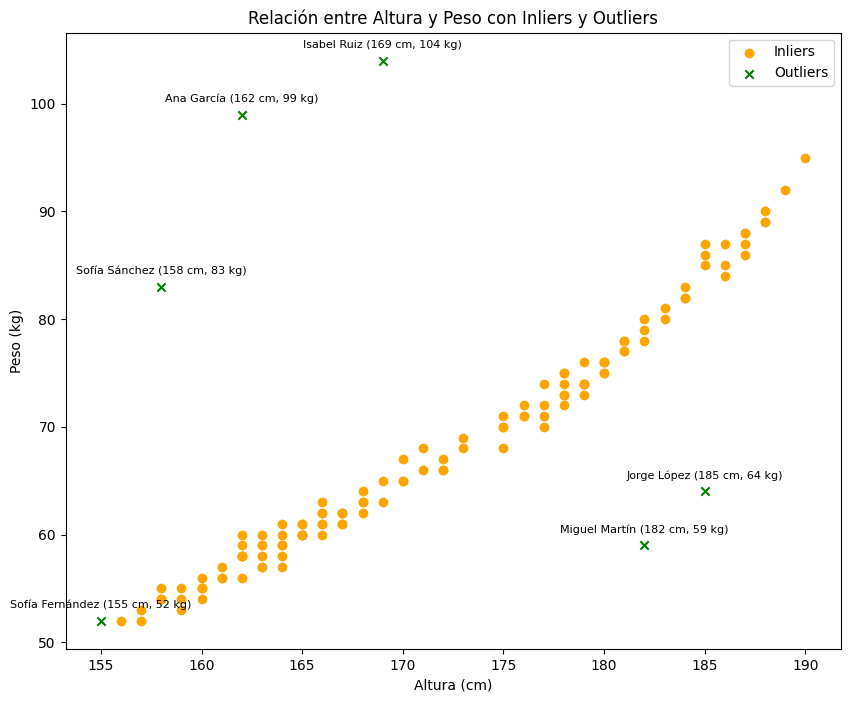

In [ ]:
# Muestra una gráfica como la anterior donde al lado de cada outlier aparezca el nombre, altura y peso

# 1. Separa los inliers y outliers
inliers_cases = customers_df[customers_df["outlier"] == 1]
outliers_cases = customers_df[customers_df["outlier"] != 1]


# 2. Crea el scatter plot
plt.figure(figsize=(10, 8))

plt.scatter(inliers_cases["height"], inliers_cases["weight"], c="orange", label="Inliers", marker="o")

plt.scatter(outliers_cases["height"], outliers_cases["weight"], c="green", label="Outliers", marker="x")

for _, row in outliers_df.iterrows():
    plt.text(row['height'], row['weight'] + 1, 
    f"{row['full_name']} ({row['height']} cm, {row['weight']} kg)", 
    color="black", fontsize=8, ha="center", va="bottom")

# 3. Etiqueta los ejes
plt.xlabel("Altura (cm)")
plt.ylabel("Peso (kg)")

# 4. Ponle un título
plt.title("Relación entre Altura y Peso con Inliers y Outliers")

# 5. Añade la leyenda
plt.legend()

# 6. Muestra la gráfica
plt.show()
